In [1]:
import pandas as pd
import numpy as np
from PostprocessTAB import ProcessorTAB

##########seed: 2023
alpha 0.0
accuracy_score 0.8628655689358565
alpha 0.2
accuracy_score 0.8828827721798967
alpha 0.4
accuracy_score 0.9023470140083558
alpha 0.6000000000000001
accuracy_score 0.9106168591791594
alpha 0.8
accuracy_score 0.9138854755468173
alpha 1.0
accuracy_score 0.914831653969034
alpha 0.0
accuracy_score 0.8622473320778405
alpha 0.2
accuracy_score 0.8810546139359697
alpha 0.4
accuracy_score 0.9001129943502825
alpha 0.6000000000000001
accuracy_score 0.90706842435656
alpha 0.8
accuracy_score 0.9095166352793471
alpha 1.0
accuracy_score 0.9097802887633394


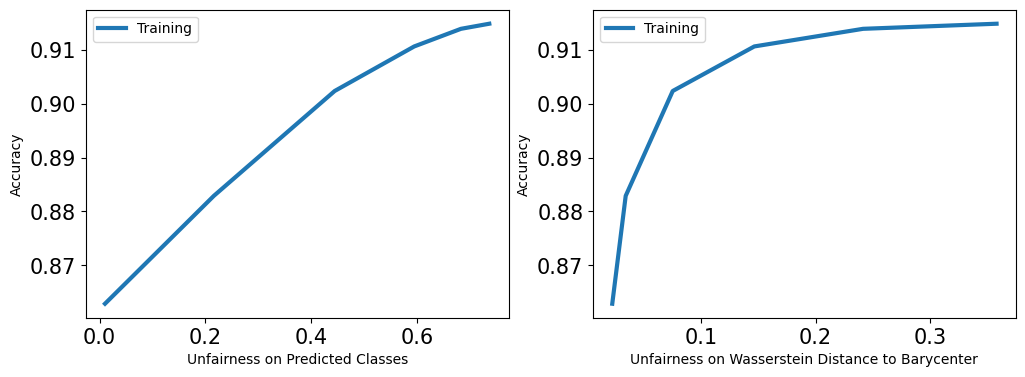

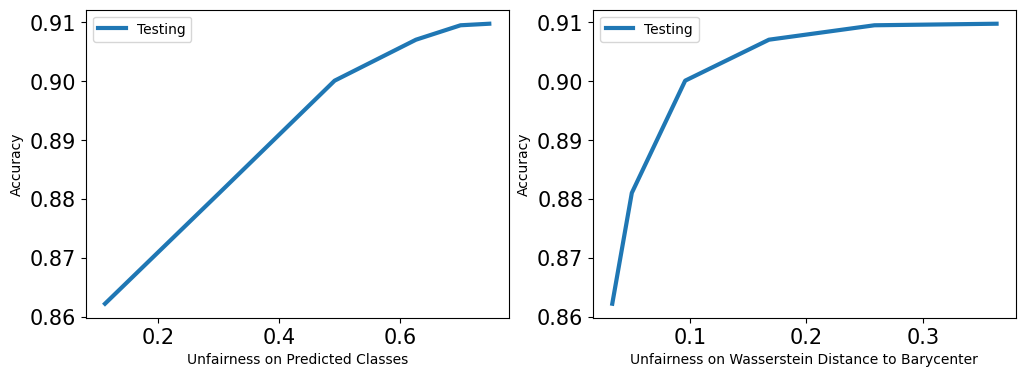

##########seed: 2024
alpha 0.0
accuracy_score 0.8647087736544604
alpha 0.2
accuracy_score 0.8835217498156794
alpha 0.4
accuracy_score 0.9023593020398133
alpha 0.6000000000000001
accuracy_score 0.9102727942983535
alpha 0.8
accuracy_score 0.913123617596461
alpha 1.0
accuracy_score 0.9134676824772671
alpha 0.0
accuracy_score 0.8640175768989329
alpha 0.2
accuracy_score 0.8820087884494665
alpha 0.4
accuracy_score 0.8992718141870683
alpha 0.6000000000000001
accuracy_score 0.9065913370998118
alpha 0.8
accuracy_score 0.9086377903327056
alpha 1.0
accuracy_score 0.9086001255492782


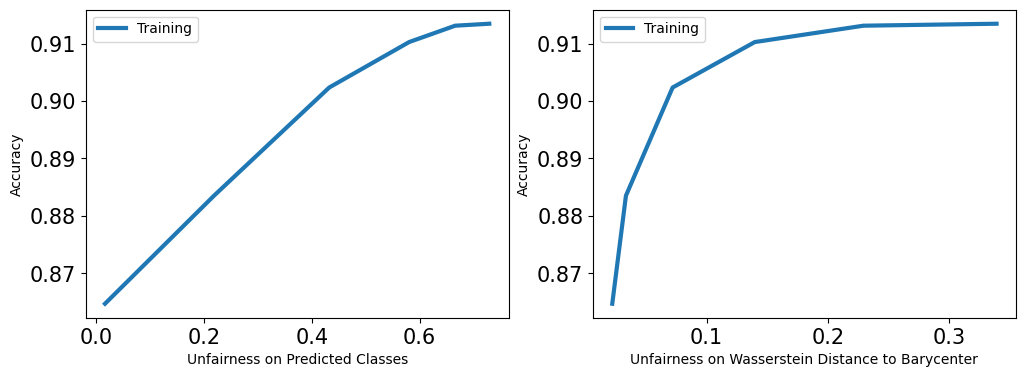

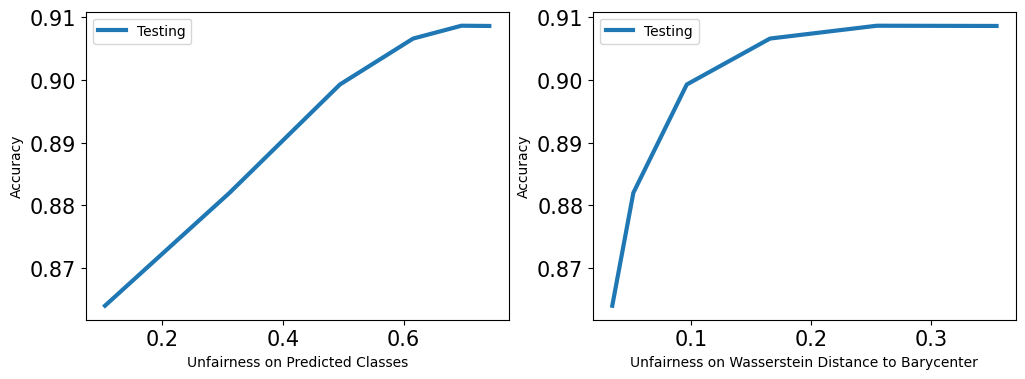

##########seed: 2025
alpha 0.0
accuracy_score 0.8648316539690342
alpha 0.2
accuracy_score 0.8823543868272303
alpha 0.4
accuracy_score 0.9010321946424182
alpha 0.6000000000000001
accuracy_score 0.9096215286311132
alpha 0.8
accuracy_score 0.9127795527156548
alpha 1.0
accuracy_score 0.9137503072007863
alpha 0.0
accuracy_score 0.8640677966101695
alpha 0.2
accuracy_score 0.8819711236660389
alpha 0.4
accuracy_score 0.89954802259887
alpha 0.6000000000000001
accuracy_score 0.9055869428750786
alpha 0.8
accuracy_score 0.9081858129315756
alpha 1.0
accuracy_score 0.9084871311989957


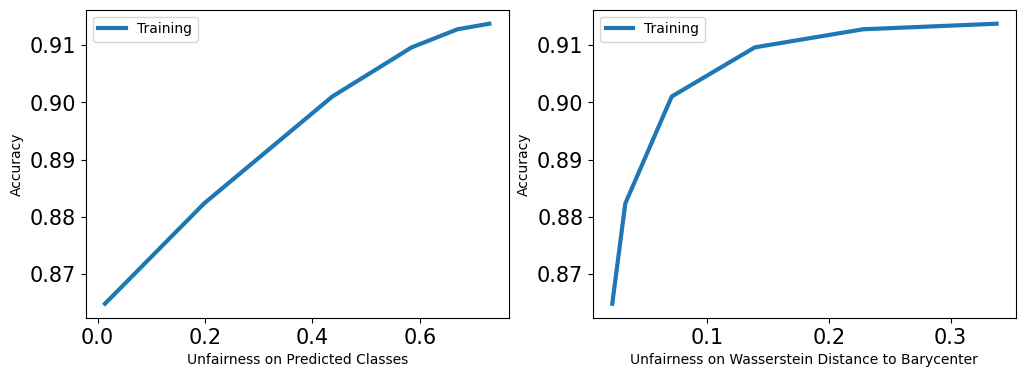

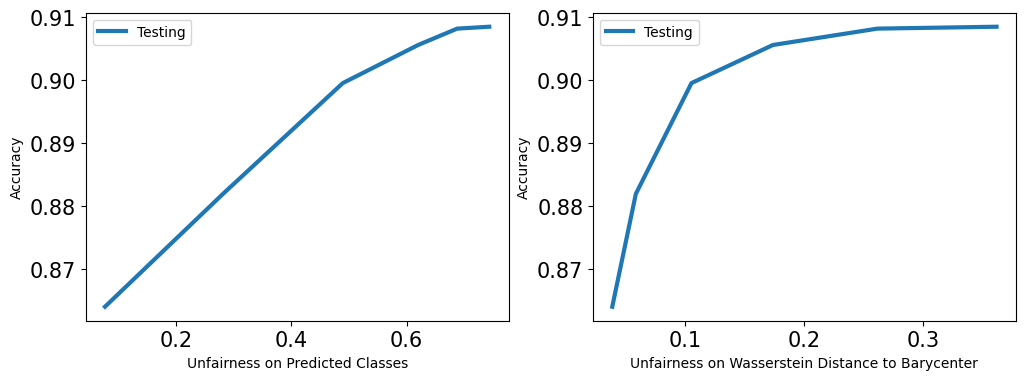

##########seed: 2026
alpha 0.0
accuracy_score 0.8640452199557631
alpha 0.2
accuracy_score 0.8829933644630131
alpha 0.4
accuracy_score 0.9014868518063407
alpha 0.6000000000000001
accuracy_score 0.9105062668960432
alpha 0.8
accuracy_score 0.9131604816908331
alpha 1.0
accuracy_score 0.9137134431064144
alpha 0.0
accuracy_score 0.8639171374764596
alpha 0.2
accuracy_score 0.8822096672944131
alpha 0.4
accuracy_score 0.8981795354676712
alpha 0.6000000000000001
accuracy_score 0.9052228499686127
alpha 0.8
accuracy_score 0.9074827369742625
alpha 1.0
accuracy_score 0.9078468298807282


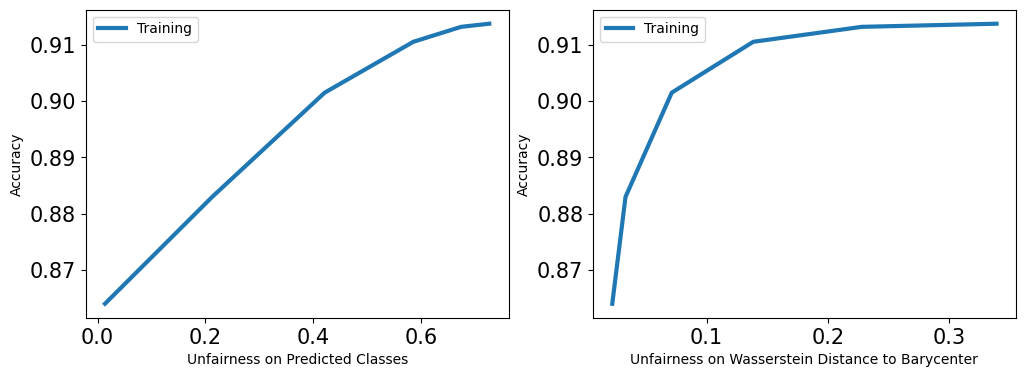

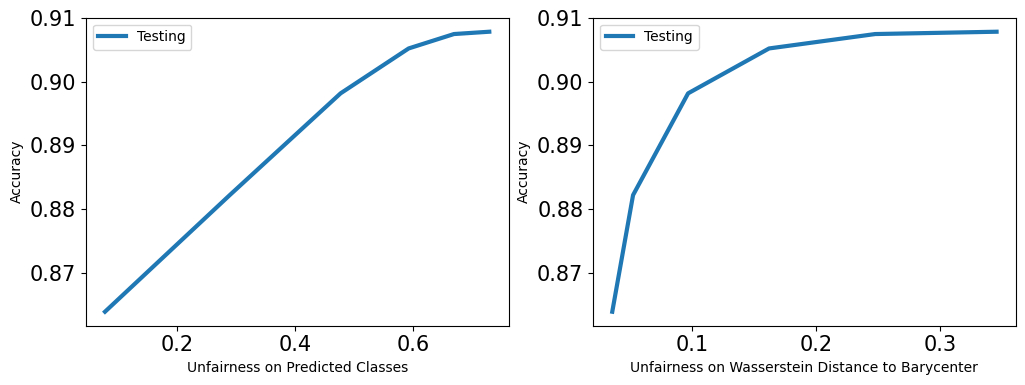

##########seed: 2027
alpha 0.0
accuracy_score 0.8646964856230032
alpha 0.2
accuracy_score 0.8837920865077413
alpha 0.4
accuracy_score 0.9025804866060458
alpha 0.6000000000000001
accuracy_score 0.9104939788645858
alpha 0.8
accuracy_score 0.9128778569673137
alpha 1.0
accuracy_score 0.9136765790120422
alpha 0.0
accuracy_score 0.864256120527307
alpha 0.2
accuracy_score 0.8823854362837414
alpha 0.4
accuracy_score 0.8986189579409919
alpha 0.6000000000000001
accuracy_score 0.9052730696798493
alpha 0.8
accuracy_score 0.9073446327683616
alpha 1.0
accuracy_score 0.9077715003138731


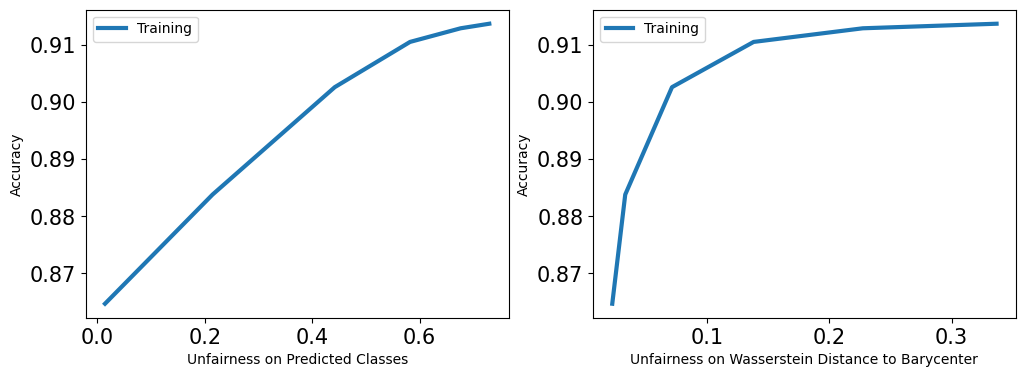

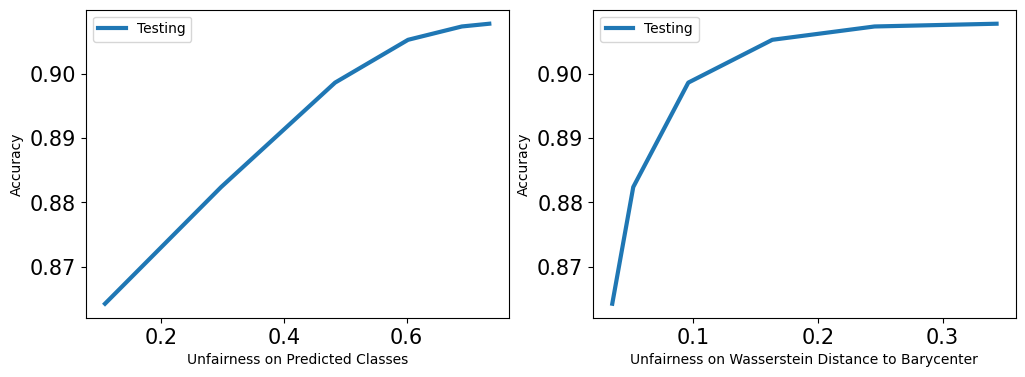

In [2]:
import warnings
warnings.filterwarnings('ignore')


seed_list=[2023,2024,2025,2026,2027]
accuracy_list_seed=[]
unfairness_list_seed=[]
wasserstein_list_seed=[]

seed_list_test=[1923,1924,1925,1926,1927]
accuracy_list_test_seed=[]
unfairness_list_test_seed=[]
wasserstein_list_test_seed=[]

bandwidth_arr = [0.04,]  ### bandwidth, 0.02 may lead to numerical issue here
for bandwidth in bandwidth_arr:

    for seed in seed_list:
        print('##########seed:', seed)
        #### Data preparation
        train_data = pd.read_csv(r'./data/train_predictions_celebA.csv')
        train_data.loc[(train_data.Male==0)&(train_data.Young==0),"Group"] = "FemaleOld"
        train_data.loc[(train_data.Male==0)&(train_data.Young==1),"Group"] = "FemaleYoung"
        train_data.loc[(train_data.Male==1)&(train_data.Young==0),"Group"] = "MaleOld"
        train_data.loc[(train_data.Male==1)&(train_data.Young==1),"Group"] = "MaleYoung"
        train_data=train_data.groupby("Group", group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=seed))
        train_data=train_data.sort_values(by="Group")
        groupsize=train_data.groupby("Group").size()
        # print('groupsize_train:', groupsize)

        test_data = pd.read_csv(r'./data/val_predictions_celebA.csv')
        test_data.loc[(test_data.Male==0)&(test_data.Young==0),"Group"] = "FemaleOld"
        test_data.loc[(test_data.Male==0)&(test_data.Young==1),"Group"] = "FemaleYoung"
        test_data.loc[(test_data.Male==1)&(test_data.Young==0),"Group"] = "MaleOld"
        test_data.loc[(test_data.Male==1)&(test_data.Young==1),"Group"] = "MaleYoung"
        test_data=test_data.groupby("Group", group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=seed-100))
        test_data=test_data.sort_values(by="Group")
        groupsize_test=test_data.groupby("Group").size()
        # print('groupsize_test:', groupsize_test)

        train_scores  =train_data.iloc[:,13:23].to_numpy()
        test_scores =test_data.iloc[:,13:23].to_numpy()
        y_train=train_data.iloc[:,3:13].to_numpy()
        y_test=test_data.iloc[:,3:13].to_numpy()
        train_sensitive_labels = train_data['Group']
        test_sensitive_labels = test_data['Group']

        #### Begin Post-processing
        postprocessor = ProcessorTAB()
        new_train_scores, T_train, supports, masses, pairwise_supp, groupsize = postprocessor.generate_new_score_train(train_scores, train_sensitive_labels, seed)
        new_test_scores, supports_test, masses_test = postprocessor.generate_new_score_test(test_scores, train_sensitive_labels, test_sensitive_labels, 
                                                                                            T_train, supports, 
                                                                                            pairwise_supp, groupsize, 
                                                                                            seed, bandwidth)

        ####Plot result
        alpha_list=np.linspace(0, 1, 6)
        accuracy_list, unfairness_list, wasserstein_list = postprocessor.evaluate_performance(supports, masses, 
                                                                            new_train_scores, train_sensitive_labels, 
                                                                            y_train,
                                                                            class_list=None, ##class_list is needed for multi-class classification
                                                                            alpha_list=alpha_list, 
                                                                            task_type='multi_label')
        accuracy_list_test, unfairness_list_test, wasserstein_list_test = postprocessor.evaluate_performance(supports_test, masses_test, 
                                                                                                new_test_scores, test_sensitive_labels,
                                                                                                y_test, 
                                                                                                class_list=None, ##class_list is needed for multi-class classification
                                                                                                alpha_list=alpha_list, 
                                                                                                task_type='multi_label')

        accuracy_list_seed.append(accuracy_list)
        unfairness_list_seed.append(unfairness_list)
        wasserstein_list_seed.append(wasserstein_list)
        accuracy_list_test_seed.append(accuracy_list_test)
        unfairness_list_test_seed.append(unfairness_list_test)
        wasserstein_list_test_seed.append(wasserstein_list_test)

        postprocessor.display_graphs(accuracy_list, unfairness_list,
                                      wasserstein_list, "Training", 
                                      groupsize, alpha_list = np.linspace(0, 1, 6))

        postprocessor.display_graphs(accuracy_list_test, unfairness_list_test,
                                      wasserstein_list_test, "Testing", 
                                      groupsize, alpha_list = np.linspace(0, 1, 6))


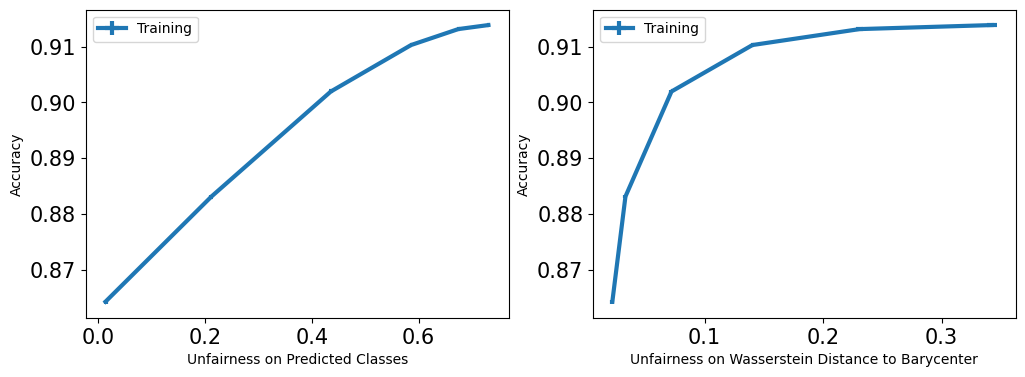

In [3]:
postprocessor.display_graphs_seed(accuracy_list_seed, unfairness_list_seed, wasserstein_list_seed, "Training", groupsize)

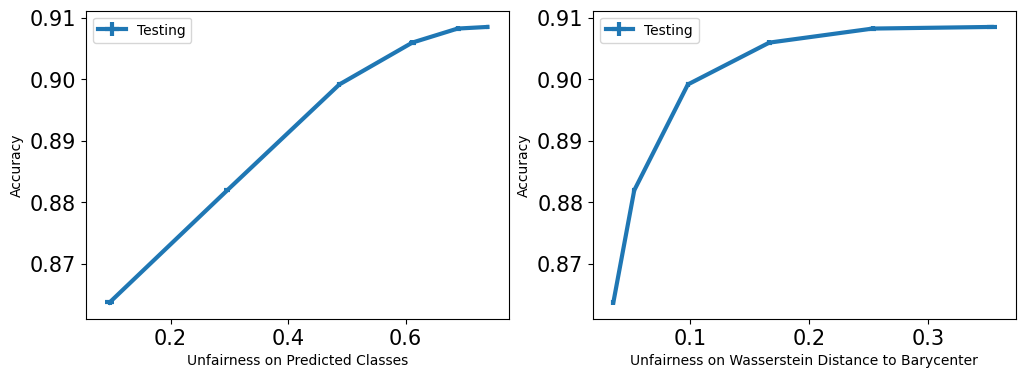

In [4]:
postprocessor.display_graphs_seed(accuracy_list_test_seed, unfairness_list_test_seed, wasserstein_list_test_seed, "Testing", groupsize)
